<a href="https://colab.research.google.com/github/ANGELA-NYUTU/Autolib-Data-Hypothesis-Testing/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_Angela_Nyutu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS OF BLUE CAR USAGE IN AUTOLIB CAR SHARING COMPANY**

# **HYPOTHESIS TESTING**





## **Stating Hypothesis**
1.Null hypothesis (Ho):There is no difference between the average number of blues cars returned on weekends at all postal code locations.

2.Alternative hypothesis (H1): There is a significant difference between the average number of blue cars returned in all posta code locations on weekends

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from numpy import abs
import scipy as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from math import sqrt
from scipy.stats import norm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Importing the dataset**

**Dataset preview**

In [2]:
#this table describes the dataset column that will be used for this analysis
dataset_description= pd.read_excel('/content/columns_explanation.xlsx')
dataset_description                 

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
df= pd.read_csv('/content/autolib_daily_events_postal_code (1).csv')

In [4]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [7]:
df.shape

(16085, 13)

In [8]:
df['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

## **Data Cleaning**

**Missing Values**

In [9]:
df.isnull().any()
#There  are no missing values

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

**Checking for duplicates**

In [10]:
df.duplicated().values.any()
#There are no duplicated values

False

**Dropping unnecessary columns**

**Formatting Column names**

In [11]:
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Checking for outliers**

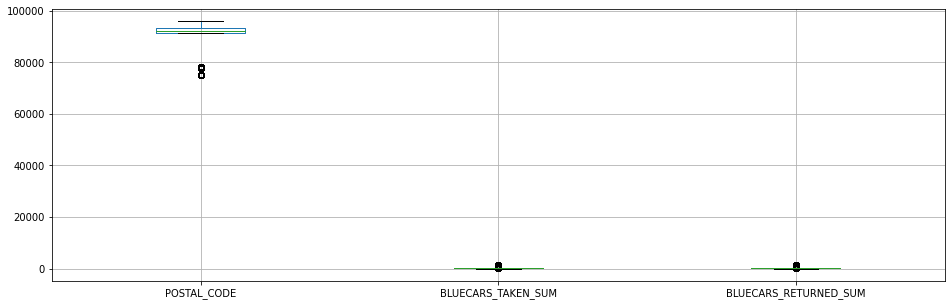

In [12]:
df.boxplot(['POSTAL_CODE','BLUECARS_TAKEN_SUM','BLUECARS_RETURNED_SUM'],figsize=(16,5))

In [13]:
df.head()

,POSTAL_CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


**Changing to proper data types**

In [14]:
dates=pd.to_datetime(df['DATE'])
df['DATE']=dates

In [15]:
df.dtypes

POSTAL_CODE                        int64
DATE                      datetime64[ns]
N_DAILY_DATA_POINTS                int64
DAYOFWEEK                          int64
DAY_TYPE                          object
BLUECARS_TAKEN_SUM                 int64
BLUECARS_RETURNED_SUM              int64
UTILIB_TAKEN_SUM                   int64
UTILIB_RETURNED_SUM                int64
UTILIB_14_TAKEN_SUM                int64
UTILIB_14_RETURNED_SUM             int64
SLOTS_FREED_SUM                    int64
SLOTS_TAKEN_SUM                    int64
dtype: object

##**Sample size calculation**

In [16]:
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans
df_new= df.iloc[:,:1]
df_new
kmeans = KMeans(2)
kmeans.fit(df_new)
clustersdf = kmeans.fit_predict(df_new)
clustersdf
df1 = df.copy()
# Create a new Series, containing the identified cluster for each observation
df1['CLUSTER'] = clustersdf
# Check the result
df1

,POSTAL_CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM,CLUSTER
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,0
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,0
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,0
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,0
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,2,3,0,0,1
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,2,1,0,0,1
16082,95880,2018-06-17,1440,6,weekend,33,35,1,1,0,0,0,0,1
16083,95880,2018-06-18,1440,0,weekday,11,14,3,5,2,2,0,0,1


## **Testing for normality**

In [17]:
cluster1=df1[df1['CLUSTER']==1]
cluster2=df1[df1['CLUSTER']==0]
df2=cluster1[cluster1['DAY_TYPE']=='weekend']
df3=cluster2[cluster2['DAY_TYPE']=='weekend']
df4=df1[df1['DAY_TYPE']=='weekend']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


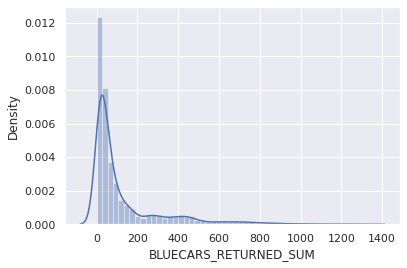

In [18]:
sns.distplot(df1['BLUECARS_RETURNED_SUM'])

## **Exploratory Data Analysis**

### **Univariate analysis**

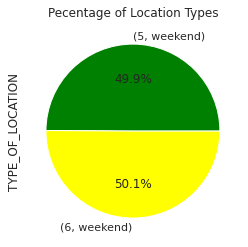

In [21]:
Weekends=df2.groupby(['DAYOFWEEK'])['DAY_TYPE'].value_counts()
Weekends.plot.pie(title= 'Pecentage of Location Types',label='TYPE_OF_LOCATION',autopct='%.1f%%', colors= ['Green', 'Yellow'])

In [22]:
df2.groupby(['CLUSTER'])['BLUECARS_RETURNED_SUM'].median()

CLUSTER
1    44
Name: BLUECARS_RETURNED_SUM, dtype: int64

In [23]:
df3.groupby(['CLUSTER'])['BLUECARS_RETURNED_SUM'].median()

CLUSTER
0    399
Name: BLUECARS_RETURNED_SUM, dtype: int64

In [24]:
print(df2['BLUECARS_RETURNED_SUM'].std())
print(df3['BLUECARS_RETURNED_SUM'].std())

68.45238014828277
300.39533496200767


In [25]:
print(df2['BLUECARS_RETURNED_SUM'].mean())
print(df3['BLUECARS_RETURNED_SUM'].mean())

65.3487358326068
423.1818181818182


In [26]:
def visualize(data, column, palette):
  datatype=data.groupby(column)[column].count()
  sns.set_style('whitegrid')
  ax=bar=plt.subplots(figsize=(8,8))
  ax=sns.barplot(x=datatype.keys(),y=datatype.values,data=data, palette=palette)
  return datatype

CLUSTER
0    1100
1    3441
Name: CLUSTER, dtype: int64

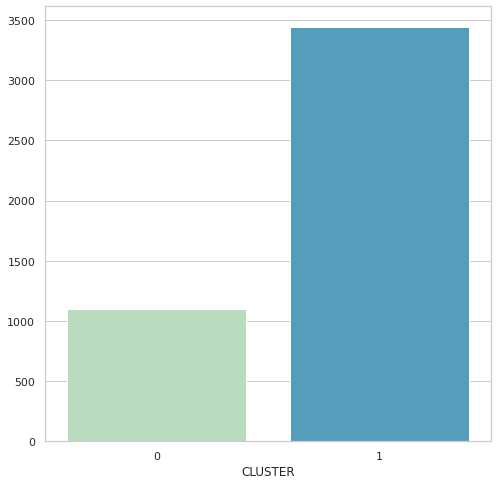

In [27]:
visualize(df4,'CLUSTER', 'GnBu')

BLUECARS_RETURNED_SUM
0       6
1      22
2      31
3      32
4      44
       ..
455     1
456     1
459     1
471     1
473     1
Name: BLUECARS_RETURNED_SUM, Length: 310, dtype: int64

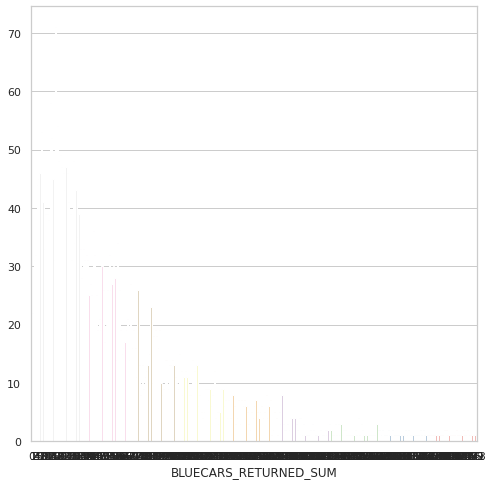

In [59]:
visualize(df2, 'BLUECARS_RETURNED_SUM','Pastel1_r')

### **Bivariate analysis**

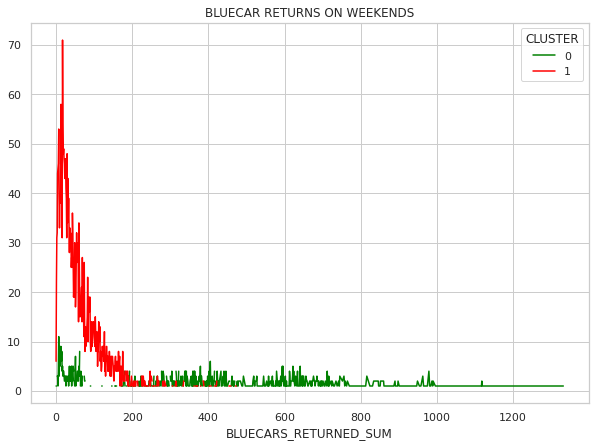

In [76]:
df4.groupby(['BLUECARS_RETURNED_SUM','CLUSTER']).DATE.count().unstack().plot(figsize=(10,7),color= ['green','red'], title=('BLUECAR RETURNS ON WEEKENDS'))

## **Testing Hypothesis**

**Leve of significance**

In [28]:
#At 95% onfidence level, the level of significance= p= alpha= 0.05
alpha=0.05

**Test statistic**

In [48]:
#z test has been used to test the hypothesis because n>30
px1=399.
px2=44.
x1=400
x2=43
s1=300.395
s2=68.45
n1=550
n2=1720
z= ((x1-x2)-(px1-px2))/sqrt((s1**2/n1)+(s2**2/n2))




In [49]:
z

0.15486128987819525

In [50]:
pvalue=1- norm.cdf(abs(z))
if pvalue >= alpha:
  print('There is no significant eveidence to reject the null hypothesis')
else:
  print('There is significant eveidence to reject the null hypothesis')

There is no significant eveidence to reject the null hypothesis


In [60]:
pvalue

0.438465335809614

**Interval estimate for parameters**

In [55]:
#at 95% confidence level
se1=s1/sqrt(n1)
#cluster1_interval
lower,upper=(400-(z*se1)),(400+(z*se1))
print(lower,upper)

398.0163994172358 401.9836005827642


In [56]:
#at 95% confidence level
se2=s2/sqrt(n2)
#cluster2_interval
lower,upper=(43-(z*se2)),(43+(z*se2))
print(lower,upper)

42.74440514860903 43.25559485139097
